In [149]:
import pandas as pd
import numpy as np

def read_data(path):
    """
    read csv file
    
    input:
        path: the file path
    output:
        a dataframe that stores all the files
            
    """
    df_chunk=pd.read_csv(path,chunksize=20000)

    res_chunk=[]
    for chunk in df_chunk:
        res_chunk.append(chunk)
    return pd.concat(res_chunk)

In [150]:
import warnings

warnings.filterwarnings('ignore')

# Session 1: 
# - Introduction

### In this mini project, we will use the Annual Developer Survey from StackOverflow from 2019 to 2021 to analysis the education and language preference of the programmers from the United States.



# This short report will answer 4 questions:

### 1.What is the relationship between working years/education and salary?
### 2.Do professional developers have a higher the education level?
### 3.Do students in this survey tend to have a higher the education level?
### 4.What is the most popular language among professional developers in the recent 3 years？

# Note: 
- Data cleaning works were done when analysing specific business questions.

# Session 2: 
# - Data Preparation

In [151]:
def extract_us_survey(df):
    """
    extract participants from US only, ignore nan data
    
    input:
        df: dataframe
    output:
        data from survery participants from US
        
    reference: https://stackoverflow.com/questions/28311655/ignoring-nans-with-str-contains
    """
    return df[df.Country.str.contains('United States', na=False)]


def read_all_data(path_arr):
    """
    an efficient file loading trick
    
    input:
        path_arr: list
        a list storing all the file paths

    output:
        res: list
        a list contains the data loaded in dataframe
    """
    res = []
    for i in path_arr:
        survey = read_data(i)
        us_survey = extract_us_survey(survey)
        # convert all the attributes to lower cases
        us_survey.columns = [i.lower() for i in us_survey.columns]
        res.append(us_survey)
    return res

path_arr = [
    './data/stack-overflow-developer-survey-2017/survey_results_public.csv',
    './data/stack-overflow-developer-survey-2018/survey_results_public.csv',
    './data/stack-overflow-developer-survey-2019/survey_results_public.csv',
    './data/stack-overflow-developer-survey-2020/survey_results_public.csv',
    './data/stack-overflow-developer-survey-2021/survey_results_public.csv'
]

In [153]:
survey_results = read_all_data(path_arr)

### Check the difference of the questionnaire those years

In [155]:
def check_df_columns(survey_res_arr):
    """
    a list contains the surver dataframe from 2017-2021
    """
    try:
        return list(set(survey_res_arr[0]).intersection(*survey_res_arr[1:]))
    except:
        print("the survey list should be a list and its length should be greater than 1")

In [156]:
check_df_columns(survey_results)

['gender', 'country']

### Finding: 
- There are only two same attributes in the surveys, so we can see that the survey contents may have been chanching each year.

# Session 3:
# Q1. The relationship between education level and salary/position

In [522]:
def check_related_columns(survey_results, topic_list):
    """
    check the topic related questions in the questionaire each year
    
        input:
            survey_results: the survery data
            topic_list: the attributes to be explored
            
        output:
            res: dictionary
            a dict sotres all the resutls
            
            format:
            key - year
            value - a list contains all topic related attributes
            
    """
    res = {}
    year = 2017
    for survey_df in survey_results:
        columns = [i.lower() for i in survey_df.columns]
        res[year] = []
        for item in columns:
            for i in topic_list:
                if i in item:
                    res[year].append(item)
                    continue
        year+=1
    return res

In [523]:
# look at the education related attributes
check_related_columns(survey_results, ['education', 'university', 'edlevel','learn','study'])

{2017: ['university',
  'formaleducation',
  'learningnewtech',
  'learnedhiring',
  'importanthiringeducation',
  'educationimportant',
  'educationtypes',
  'cousineducation',
  'highesteducationparents'],
 2018: ['formaleducation', 'educationtypes', 'educationparents'],
 2019: ['edlevel'],
 2020: ['edlevel', 'newlearn'],
 2021: ['edlevel', 'learncode']}

### Finding:
- As the education related contents were discreate, so I will only focus on the data colleted in the year of 2019,2020,2021 regarding to education.

In [526]:
# look at the salary related attributes
check_related_columns(survey_results, ['salary', 'money'])

{2017: ['stackoverflowmakemoney', 'salary', 'expectedsalary'],
 2018: ['salary', 'salarytype', 'convertedsalary'],
 2019: ['mgrmoney'],
 2020: [],
 2021: []}

In [160]:
# look at the position related attributes
check_related_columns(survey_results, ['position'])

{2017: [], 2018: [], 2019: [], 2020: [], 2021: []}

In [527]:
# look at the title related attributes
check_related_columns(survey_results, ['title'])

{2017: ['importanthiringtitles'], 2018: [], 2019: [], 2020: [], 2021: []}

### Finding:
- A1. Unfortunately, the surveies in recent two years do not have 'salary' related questions, so I cannot analyze the relations between education level and salary.

# Session 4：

# Q2. do professional developers have a higher the education level?

# Q3. do students in this survey tend to have a higher the education level?

### Finding:
- people calimed their identity such as developers, students and so on under this attribute --- MainBranch

In [532]:
# look at the identity related attributes
check_related_columns(survey_results, ['branch'])

{2017: [],
 2018: [],
 2019: ['mainbranch'],
 2020: ['mainbranch'],
 2021: ['mainbranch']}

### The education level of the paticipants who answered the questionaire.

In [162]:
def build_dictionary_survey_result(survey_results_arr):
    """
    store the survey results to a dictionary
    
    format:
        key: int, year
        val: DataFrame, survery result
    
    input:
        survey_results_arr - list
    output:
        dict_survey_results - dictionary
        
    """
    dict_survey_results = {}

    year = 2017
    
    for i in survey_results_arr:
        dict_survey_results[year] = i
        year += 1
        
    return dict_survey_results

dict_survey_results = build_dictionary_survey_result(survey_results)

In [163]:
data_2019 = dict_survey_results[2019]
data_2020 = dict_survey_results[2020]
data_2021 = dict_survey_results[2021]

In [164]:
education_data = [data_2019, data_2020, data_2021]

### extract the survery filled by developers and students

In [165]:
def extract_profession_developer(df):
    """
    extract the surveys from developers
    """
    return df[df.mainbranch.str.contains('I am a developer by profession', na=False)]

def extract_student_developer(df):
    """
    extract the surveys from students
    """
    return df[df.mainbranch.str.contains('I am a student', na=False)]

In [166]:
profession_education_data = []
student_education_data = []

for i in education_data:
    profession_education_data.append(extract_profession_developer(i))
    student_education_data.append(extract_student_developer(i))

### glance at the education distribution in the recent 3 years

In [177]:
year = 2019
for i in profession_education_data:
    print('Year', year)
    print(i.edlevel.value_counts(normalize=True))
    print('--------------------------------------------------------------------------------------------')
    year += 1

Year 2019
Bachelor’s degree (BA, BS, B.Eng., etc.)                                              0.596495
Master’s degree (MA, MS, M.Eng., MBA, etc.)                                           0.178967
Some college/university study without earning a degree                                0.121252
Associate degree                                                                      0.044194
Other doctoral degree (Ph.D, Ed.D., etc.)                                             0.025039
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)    0.023099
Professional degree (JD, MD, etc.)                                                    0.004507
I never completed any formal education                                                0.003318
Primary/elementary school                                                             0.003130
Name: edlevel, dtype: float64
--------------------------------------------------------------------------------------------
Year 2020
Ba

In [243]:
def get_edlevel_percentage_list(df_arr):
    """
    get the distribution and store them in a list in percentage of the education level
    
    the results are stored in a descending sort
    
    Six decimal places
    
    input:
        the suvery result array
        
    output:
        the education percentage array
    """
    edlevel_percentage_list = []
    for i in df_arr:
        temp = pd.DataFrame(i.edlevel.value_counts(normalize=True)).reset_index()
        temp.columns = ['edlevel', 'percentage']
        temp.replace('I never completed any formal education', 'Something else',inplace=True)
        temp.sort_values('edlevel',inplace=True)
        edlevel_percentage_list.append([int(item * 10000) / 10000 for item in list(temp.percentage.values)])
        
    return edlevel_percentage_list

In [287]:
year = 2019
for i in student_education_data:
    print('Year', year)
    print(i.edlevel.value_counts(normalize=True))
    print('--------------------------------------------------------------------------------------------')
    year += 1

Year 2019
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)    0.308140
Some college/university study without earning a degree                                0.292636
Bachelor’s degree (BA, BS, B.Eng., etc.)                                              0.173773
Primary/elementary school                                                             0.083979
Associate degree                                                                      0.078811
Master’s degree (MA, MS, M.Eng., MBA, etc.)                                           0.049742
Other doctoral degree (Ph.D, Ed.D., etc.)                                             0.004522
I never completed any formal education                                                0.004522
Professional degree (JD, MD, etc.)                                                    0.003876
Name: edlevel, dtype: float64
--------------------------------------------------------------------------------------------
Year 2020
So

In [348]:
def get_edlevel_percentage_dict(df_arr):
    """
    get the distribution and store them in a dictionary in percentage of the education level
    
    the results are stored in a descending sort
    
    six decimal places
    
    note - to keep the consistency of the analysis, some name of the columns will be modified.
    
    input:
        the survery results array
        
    output:
        the education percentage dictionary
    """
    student_edlevel_percentage_dict = {}
    year = 2019
    for i in df_arr:
        temp = pd.DataFrame(i.edlevel.value_counts(normalize=True)).reset_index()
        temp.columns = ['edlevel', 'percentage']
        temp.replace('I never completed any formal education', 'Something else',inplace=True)
        temp.replace('Other doctoral degree (Ph.D, Ed.D., etc.)', 'Other doctoral degree (Ph.D., Ed.D., etc.)', inplace=True)
        temp.replace('Master’s degree (MA, MS, M.Eng., MBA, etc.)', 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)', inplace=True)
        temp.replace('Associate degree', 'Associate degree (A.A., A.S., etc.)',inplace=True)
        temp.replace('Bachelor’s degree (BA, BS, B.Eng., etc.)', 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)', inplace=True)
        temp.sort_values('edlevel',inplace=True)
        temp['percentage'] = [int(item * 10000) / 10000 for item in list(temp.percentage.values)]
        
        i_edleevl_dict = temp.set_index(['edlevel'])['percentage'].to_dict()
        
        student_edlevel_percentage_dict[year] = i_edleevl_dict
        
        year+=1
    return student_edlevel_percentage_dict

In [349]:
student_edlevel_percentage_dict = get_edlevel_percentage_dict(student_education_data)

In [368]:
professional_edlevel_percentage_dict = get_edlevel_percentage_dict(profession_education_data)

In [350]:
def sort_edlevel_percentage(student_edlevel_percentage_dict, year=2019):
    """
    sort the education level percentage according to their keys, as the sequence of categories were different each year

    input:
        student_edlevel_percentage_dict: dictionary
                                         key - year, int
                                         value - education level percentage of the year, float
        year: int
              the start year of the education level being analyzed
      
    output:
        labels: list
                it contains all the categories

        percentage_arr: 2D list
                it stores all the education level percentage data of the years being analyzed, and the sequence in 
                the same order as the categories.
            
        
    """
    data_first_group_dict = student_edlevel_percentage_dict[year]
    percentage_first_group = np.array(list(data_first_group_dict.values()))
    labels_first_group = np.array(list(data_first_group_dict.keys()))
    
    first_group = sorted(percentage_first_group)
    first_sort_index = percentage_first_group.argsort()
    
    labels = labels_first_group[first_sort_index]
    
    percentage_arr = []
    percentage_arr.append(first_group)

    for idx, val in enumerate(student_edlevel_percentage_dict):

        if idx == 0:
            continue
        cur_percentage_arr = []


        for i in labels:

            cur_percentage_arr.append(student_edlevel_percentage_dict[val][i])
        percentage_arr.append(cur_percentage_arr)
        
    return labels, percentage_arr

In [351]:
labels, student_edlevel_percentage_arr = sort_edlevel_percentage(student_edlevel_percentage_dict)

In [369]:
labels2, professional_edlevel_percentage_arr = sort_edlevel_percentage(professional_edlevel_percentage_dict)

In [366]:
def plot_edlevel_chart(labels, edulevel_percentage_arr, title_content, years_label=[2019,2020,2021]):
    """
    plot the education level bar chart
    
    """
    # get the labels

    years = years_label

    # preparation works for drawing
    plt.figure(figsize=(28, 8))

    # sort the data to make them in an ascending order
    first = edulevel_percentage_arr[0]
    second = edulevel_percentage_arr[1]
    third = edulevel_percentage_arr[2]

    plt.subplot(132)
    x = np.arange(len(labels))  # the position of x labels
    width = 0.25  # width of bar
    # x - width，x， x + width === the position of each group of data in x axis
    plt.bar(x - width, first, width, label='2019')
    plt.bar(x, second, width, label='2020')
    plt.bar(x + width, third, width, label='2021')
    plt.ylabel('Percentage')
#     plt.title('The Education Level of Professional Developers in 2019,2020,2021')
    plt.title(title_content)

    plt.xticks(x, labels=labels)
    plt.xticks(rotation=-90)
    plt.legend()

    plt.show()

# A2. The Education Level of profession developers in 2019,2020,2021'


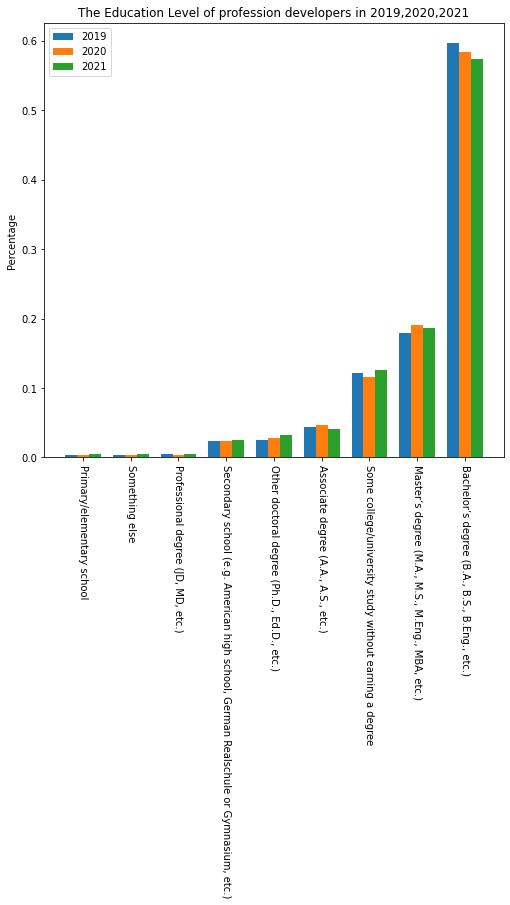

In [533]:
plot_edlevel_chart(labels2, professional_edlevel_percentage_arr, title_content='The Education Level of profession developers in 2019,2020,2021')

### Finding：
- From the chart we can see that from 2018 to 2021, around 80% of the professional developers have recerived higher education (higher or equal to college/university experience)

# A3. The Education Level of student programmers in 2019,2020,2021

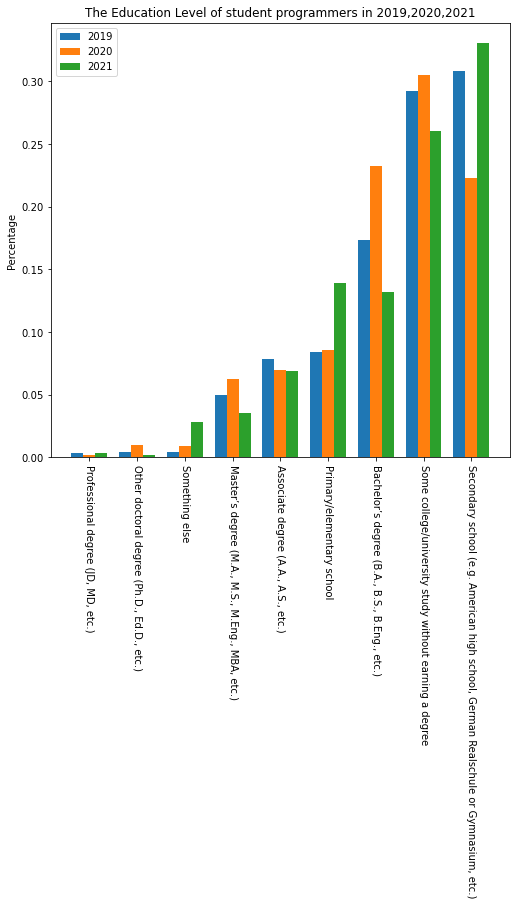

In [535]:
plot_edlevel_chart(labels, student_edlevel_percentage_arr, title_content='The Education Level of student programmers in 2019,2020,2021')

### Finding:
- From the chart, we can see that the number of programmers under university has increased, particularly in 2021, and the percentage of the respondents who have higher education experience is compressed in 2021.

- We may predict that the number of younger programmers will be increasing in the US.


# Sesson 5:

# Q4. What is the most popular language among professional developers？

In [519]:
# languages
check_related_columns(survey_results, ['language'])

{2017: ['haveworkedlanguage', 'wantworklanguage'],
 2018: ['languageworkedwith', 'languagedesirenextyear'],
 2019: ['languageworkedwith', 'languagedesirenextyear'],
 2020: ['languagedesirenextyear', 'languageworkedwith'],
 2021: ['languageworkedwith', 'languagedesirenextyear']}

In [410]:
profession_education_data

,respondent,mainbranch,hobbyist,opensourcer,opensource,employment,country,student,edlevel,undergradmajor,...,welcomechange,sonewcontent,age,gender,trans,sexuality,ethnicity,dependents,surveylength,surveyease
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
12,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
21,22,I am a developer by profession,Yes,Less than once per year,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,Some college/university study without earning ...,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,47.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
22,23,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Information systems, information technology, o...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Tech...,22.0,Man,No,Straight / Heterosexual,Black or of African descent,No,Appropriate in length,Easy
25,26,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,United States,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,34.0,Man,No,Gay or Lesbian,NaN,No,Appropriate in length,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88312,88865,I am a developer by profession,No,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A social science (ex. anthropology, psychology...",...,Just as welcome now as I felt last year,NaN,36.0,Man,No,Gay or Lesbian,White or of European descent,No,Appropriate in length,Easy
88321,88874,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of LOWER quality than prop...",Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A social science (ex. anthropology, psychology...",...,Just as welcome now as I felt last year,NaN,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
88323,88876,I am a developer by profession,Yes,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,A lot less welcome now than last year,NaN,23.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
88324,88877,I am a developer by profession,Yes,Less than once per year,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,48.0,Man,No,Straight / Heterosexual,South Asian,Yes,Too long,Neither easy nor difficult


In [398]:
def convert_language_attributes(df_arr):
    """
    convert the column names of some attributes to maintain the consistency
    """
    for i in df_arr:
        attributes = i.columns
        if 'haveworkedlanguage' in attributes:
            i.rename(columns={"haveworkedlanguage": "languageworkedwith"},inplace=True)
        if 'languagehaveworkedwith' in attributes:
            i.rename(columns={"languagehaveworkedwith": "languageworkedwith"},inplace=True)
        if 'wantworklanguage' in attributes:
            i.rename(columns={"wantworklanguage": "languagedesirenextyear"},inplace=True)
        if 'languagewanttoworkwith' in attributes:
            i.rename(columns={"languagewanttoworkwith": "languagedesirenextyear"},inplace=True)

    return df_arr

In [411]:
language_data = convert_language_attributes(profession_education_data)

In [412]:
# look at the languae related attributes
check_related_columns(b, ['language'])

{2017: ['languageworkedwith', 'languagedesirenextyear'],
 2018: ['languagedesirenextyear', 'languageworkedwith'],
 2019: ['languageworkedwith', 'languagedesirenextyear']}

In [502]:
year = 2019
for i in language_data:
    print('Year', year)
    print(len(i.languagedesirenextyear.unique()))
    print(i.languageworkedwith.value_counts(normalize=True))
    print('--------------------------------------------------------------------------------------------')
    year += 1

Year 2019
7646
C#;HTML/CSS;JavaScript;SQL                                                                             0.022634
C#;HTML/CSS;JavaScript;SQL;TypeScript                                                                  0.016158
HTML/CSS;JavaScript                                                                                    0.012756
HTML/CSS;JavaScript;PHP;SQL                                                                            0.011186
Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;SQL;TypeScript                                            0.011121
                                                                                                         ...   
Assembly;Bash/Shell/PowerShell;C++;C#;F#;HTML/CSS;Java;JavaScript;Kotlin;PHP;Python;R;Ruby;Rust;SQL    0.000065
Bash/Shell/PowerShell;C++;Go;Java;Python;SQL;Other(s):                                                 0.000065
Bash/Shell/PowerShell;C++;C#;HTML/CSS;Java;JavaScript;Python;Ruby;SQL;TypeScript         

In [505]:
def counter2percentile(arr):
    """
    Keep four decimal places
    
    input:
        arr: a list sotring numbers
    
    output:
        res: a list sotring numbers with only 4 decimal places
    
    """
    total = sum(list(dict(arr).values()))
    res = {}
    i = 0
    for k,v in dict(arr).items():
        res[k] = int(v/total * 10000) / 10000
        i += 1
        if i == 10:
            break
    return res
        
        
def LanguageCounter(df_arr, attribute, year):
    """
    get the total number of the languages be voted.
    1) extract each language from the raw data combined with ';'
    2) calculate its percentage
    3) rank and store them in a dictionary - key: int - year, values: list - percentages

    input:
            df_arr: pandas dataframe
            attribute: the attribute we want to explore. we will look at the language situation later
            year: the first year of the years that we want to explore
    output:
            res: dictionary
            
            format:
            {
            year_1:
                {
                    language_A: percentage,
                    language_B: percentage...
                },
            year_2:
                {
                    language_A: percentage,
                    language_B: percentage...
                },
            }
    """
    res = {}
    year = year
    for i in df_arr:
        i.dropna(axis='index', how='all', subset=[attribute], inplace=True)
        # remove na
        language = [g for col in i[attribute] for g in col.split(';')]
        cur_counter = Counter(language).most_common()
        cur_counter = counter2percentile(cur_counter)
        res[year] = cur_counter
        year += 1
    return res

In [506]:
worked_language_counter_dict = LanguageCounter(language_data, 'languageworkedwith', 2019)

In [508]:
tolearn_language_counter_dict = LanguageCounter(language_data, 'languagedesirenextyear', 2019)

In [510]:
def build_language_ranking_table(language_statistic_dict):
    """
    build a table that sotres the language popularity

    input:
            language_statistic_dict: a dictionary that store the ranks of the languages

            format:
            {
            year_1:
                {
                    language_A: percentage,
                    language_B: percentage...
                },
            year_2:
                {
                    language_A: percentage,
                    language_B: percentage...
                },
            }
    output:
            a new dataframe
    """
    res = pd.DataFrame()
    for i in language_statistic_dict:
        res[i] = list(language_statistic_dict[i].keys())
    res.reset_index(inplace=True)
    res.rename(columns={'index':'rank'},inplace=True)
    res['rank'] += 1
    return res

# The top 10 languages that profession developers have worked with

In [517]:
build_language_ranking_table(worked_language_counter_dict)

,rank,2019,2020,2021
0,1,JavaScript,JavaScript,JavaScript
1,2,HTML/CSS,HTML/CSS,HTML/CSS
2,3,SQL,SQL,SQL
3,4,Bash/Shell/PowerShell,Python,Python
4,5,Python,Bash/Shell/PowerShell,Bash/Shell
5,6,C#,C#,Node.js
6,7,Java,Java,TypeScript
7,8,TypeScript,TypeScript,C#
8,9,C++,C++,Java
9,10,PHP,PHP,C++


# The top 10 languages that profession developers want to learn

In [518]:
build_language_ranking_table(tolearn_language_counter_dict)

,rank,2019,2020,2021
0,1,JavaScript,JavaScript,JavaScript
1,2,Python,Python,Python
2,3,HTML/CSS,SQL,TypeScript
3,4,SQL,HTML/CSS,HTML/CSS
4,5,TypeScript,TypeScript,SQL
5,6,Bash/Shell/PowerShell,C#,Node.js
6,7,C#,Bash/Shell/PowerShell,Rust
7,8,Go,Rust,C#
8,9,Java,Go,Bash/Shell
9,10,C++,Java,Go


### Findings:
- We can see that the front-end languages JavaScript and HTML/CSS are the languages that most developers want to learn.

- These two languages are also the languages that developers have worked with.

- Typescripe - another frontend language is also popular in the recent 3 years either in people's experience or in desire to learn table. node.js appeared in No.5 and No.6 in the two tables above in 2021.

- We may safely say that to have some knowledge on these languages is a preference when seeking a job.


- Although many developers have used C++, it was not in the language want to learn table in 2020 and 2021.

# Session 6:
# Conclusion:

- Most professional developers have high education experience.
- A rising cohort of US coders under the age of 18.
- The popularity of C++ decreased, and Frontend tech stack is hot. This trend seems to be lasting.